In [7]:
from sklearn.datasets import fetch_olivetti_faces

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from random import randint
%matplotlib inline

In [3]:
# Download Images and initialize the class 'fetch_olivetti_faces' from scikit learn dataset 
faces = fetch_olivetti_faces()

In [9]:
faces.data.shape

(400, 4096)

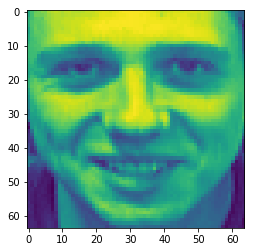

In [11]:
# Pick up the random image of face 
random_image_index = randint(0,faces.data.shape[0] + 1)
plt.imshow(faces.images[random_image_index])

In [5]:
faces.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [6]:
faces.images[1]

array([[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264, 0.18595041,
        0.18595041],
       [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603, 0.2107438 ,
        0.2107438 ],
       [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933, 0.20661157,
        0.20661157],
       ...,
       [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 , 0.1446281 ,
        0.1446281 ],
       [0.77272725, 0.7768595 , 0.7892562 , ..., 0.13636364, 0.13636364,
        0.13636364],
       [0.7644628 , 0.7892562 , 0.78099173, ..., 0.15289256, 0.15289256,
        0.15289256]], dtype=float32)

In [7]:
faces.data[1].reshape(64,64)

array([[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264, 0.18595041,
        0.18595041],
       [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603, 0.2107438 ,
        0.2107438 ],
       [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933, 0.20661157,
        0.20661157],
       ...,
       [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 , 0.1446281 ,
        0.1446281 ],
       [0.77272725, 0.7768595 , 0.7892562 , ..., 0.13636364, 0.13636364,
        0.13636364],
       [0.7644628 , 0.7892562 , 0.78099173, ..., 0.15289256, 0.15289256,
        0.15289256]], dtype=float32)

In [14]:
# Checking if reshaped 'data' to 64 x 64 is same as image at any given randomly chosen index 
np.array_equal(faces.data[random_image_index].reshape(64,64), faces.images[random_image_index])

True

# Classification using SVM

In [15]:
# Extracting data, which is flattened version of any image
features = faces.data
# Extracting the ouput value which is the hot-encoded value of ID of a person
targets = faces.target

In [16]:
# Splitting the data using sklearn library
X_train,X_test,y_train,y_test = train_test_split(features,targets,train_size=0.8)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
# initializing the SVM classifier
classifier = SVC(kernel="linear") # default kernel=rbf
# training using 'training data'
classifier.fit(X_train, y_train) # fit the model for training data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
# predict the 'target' for 'test data'
prediction_test_targets = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, prediction_test_targets)
print("Accuracy for test data:", test_accuracy)

Accuracy for test data: 0.975


# Classification using Artificial Neural Network

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [13]:
features = faces.data
targets = faces.target

In [14]:
targets_categorical = to_categorical(targets)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(features,targets_categorical,train_size=0.8)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
classifier = Sequential()

W1116 08:57:40.788306 12132 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [17]:
classifier.add(Dense(units=10000,activation='relu',input_dim=4096))
classifier.add(Dense(units=4096,activation='relu'))
classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=40,activation='softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W1116 08:57:40.854130 12132 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1116 08:57:40.858120 12132 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1116 08:57:40.959849 12132 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1116 08:57:40.996763 12132 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [18]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10000)             40970000  
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              40964096  
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 40)                2600      
Total params: 83,001,976
Trainable params: 83,001,976
Non-trainable params: 0
_________________________________________________________________


In [19]:
classifier.fit(x=X_train,y=y_train,batch_size=40,epochs=10)

W1116 08:57:41.255061 12132 deprecation.py:323] From F:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1116 08:57:41.370748 12132 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
320/320 [==============================] - 16s 49ms/step - loss: 12.9368 - acc: 0.0250
Epoch 2/10
320/320 [==============================] - 11s 36ms/step - loss: 15.7151 - acc: 0.0250
Epoch 3/10
320/320 [==============================] - 11s 34ms/step - loss: 15.7151 - acc: 0.0250
Epoch 4/10
320/320 [==============================] - 12s 36ms/step - loss: 15.7151 - acc: 0.0250
Epoch 5/10
320/320 [==============================] - 11s 36ms/step - loss: 15.7151 - acc: 0.0250
Epoch 6/10
320/320 [==============================] - 12s 38ms/step - loss: 15.7151 - acc: 0.0250
Epoch 7/10
320/320 [==============================] - 12s 37ms/step - loss: 15.7151 - acc: 0.0250
Epoch 8/10
320/320 [==============================] - 11s 36ms/step - loss: 15.7151 - acc: 0.0250
Epoch 9/10
320/320 [==============================] - 11s 34ms/step - loss: 15.7151 - acc: 0.0250
Epoch 10/10
320/320 [==============================] - 11s 35ms/step - loss: 15.7151 - acc: 0.0250


Using simple ANN would not give the good accuracy as at validation step, accuracy of 0.025 is attained.

ANN is not the great choice for this..

So let's try with Convolutional Neural Network

# Classification using CNN

In [21]:
from keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten
from keras.models import Sequential

In [22]:
# Initialize the CNN classifier
classifier_CNN = Sequential()

W1123 11:15:16.759121  8520 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [24]:
# Add the dense layers one by one 
# Add the convolution layers for which input is 64x64 containing 16 filters each of size 3x3
classifier_CNN.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(64,64,1),activation='relu'))
# Add Max Pooling Layer
classifier_CNN.add(MaxPooling2D(pool_size=(2,2)))
# Add convolution layer having 16 filter each with size 3x3
classifier_CNN.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu'))
classifier_CNN.add(MaxPooling2D(pool_size=(2,2)))
classifier_CNN.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu'))
classifier_CNN.add(MaxPooling2D(pool_size=(2,2)))
# Add the layer to flatten
classifier_CNN.add(Flatten())
classifier_CNN.add(Dense(units=256,activation='relu'))
# Add the output layer to classify the 40 faces
classifier_CNN.add(Dense(units=40,activation='softmax'))

classifier_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W1123 11:18:44.751511  8520 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1123 11:18:45.079503  8520 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1123 11:18:45.348642  8520 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1123 11:18:45.571010  8520 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1123 11:18:45.613895  8520 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log i

In [25]:
classifier_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [26]:
images = faces.images
targets = faces.target

In [29]:
targets_categorical = to_categorical(targets)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(images,targets_categorical,train_size=0.8)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (320, 64, 64)
Shape of y_train: (320, 40)
Shape of X_test: (80, 64, 64)
Shape of y_test: (80, 40)


In [32]:
# reshaping the dimensions to feed to neural network
X_train = X_train.reshape(320, 64, 64, 1)
X_test = X_test.reshape(80, 64, 64, 1)

In [33]:
classifier_CNN.fit(x=X_train,y=y_train,epochs=20,batch_size=40)

W1123 11:21:26.475325  8520 deprecation.py:323] From F:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1123 11:21:26.576527  8520 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/20
320/320 [==============================] - 4s 12ms/step - loss: 3.6959 - acc: 0.0281
Epoch 2/20
320/320 [==============================] - 0s 1ms/step - loss: 3.6765 - acc: 0.0281
Epoch 3/20
320/320 [==============================] - 0s 1ms/step - loss: 3.6561 - acc: 0.0750
Epoch 4/20
320/320 [==============================] - 0s 1ms/step - loss: 3.6209 - acc: 0.0563
Epoch 5/20
320/320 [==============================] - 0s 1ms/step - loss: 3.5671 - acc: 0.1000
Epoch 6/20
320/320 [==============================] - 0s 1ms/step - loss: 3.4572 - acc: 0.2031
Epoch 7/20
320/320 [==============================] - 0s 1ms/step - loss: 3.2401 - acc: 0.3563
Epoch 8/20
320/320 [==============================] - 0s 1ms/step - loss: 2.8694 - acc: 0.3844
Epoch 9/20
320/320 [==============================] - 0s 1ms/step - loss: 2.3584 - acc: 0.5406
Epoch 10/20
320/320 [==============================] - 0s 1ms/step - loss: 1.7948 - acc: 0.6625
Epoch 11/20
320/320 [===========================

In [35]:
# Preducting using the testing input ie , X_test
y_pred = classifier_CNN.predict(X_test)

In [36]:
y_pred[0]

array([7.2979308e-14, 8.7141072e-15, 4.5940609e-04, 2.3132088e-08,
       3.5710406e-04, 2.3867766e-10, 3.7839206e-07, 3.4167564e-09,
       4.4171252e-06, 1.7066468e-05, 1.5479032e-10, 3.3997625e-04,
       4.0844001e-04, 2.6674938e-08, 1.4922435e-07, 1.7761936e-06,
       3.8693603e-02, 1.6425116e-06, 4.9021654e-08, 5.8842124e-03,
       1.4256992e-02, 8.5909985e-10, 8.6879581e-06, 6.2507290e-08,
       1.6751878e-03, 5.2844493e-06, 6.7313783e-07, 9.1255295e-08,
       2.2244800e-03, 1.9573231e-04, 7.4529045e-05, 2.5944338e-08,
       5.0190563e-05, 8.9939601e-12, 8.5835856e-01, 1.5649320e-07,
       2.4575302e-06, 5.3907938e-06, 9.9201628e-04, 7.5981110e-02],
      dtype=float32)

In [37]:
y_pred = np.around(y_pred)

In [38]:
y_pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0.], dtype=float32)

In [40]:
# Accuracy
accuracy_score(y_true=y_test,y_pred=y_pred)

0.925

## from above models (SVM, ANN and CNN), SVM achieved the accuracy of 0.975 and CNN achieved the accuracy of 0.925